<a href="https://colab.research.google.com/github/Triveni1349/NPL-LAB/blob/main/nlpproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fasttext keras scikit-learn matplotlib pandas numpy soundex


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
  Preparing metadata (setup.py) ... done
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498211 sha256=e805777d5112a27c9e5ac035bddce2507faeea6523c16f7351fc95114acfa139
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
  Created wheel for soundex: filename=soundex-1.1.3-py3-none-any.whl size=8874 sha256=1f7738e7b1add7b0cefe14c4416bcf2e893783a8c8686ed2aa8c28c64462cac8
  Stored in directory: /root/.cache/pip/wheels/f2/3f/e6/7abb4f928e7684b9f65509ebcd241cad91f260e35d1b9c0bc2
  Created wheel for silpa_common: filename=silpa_c

In [2]:
from keras.preprocessing.text import Tokenizer


ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [3]:
!pip install fasttext soundex


In [4]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from soundex import Soundex
import fasttext

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Conv1D, GlobalMaxPooling1D, Dense, Dropout, Embedding,
    Input, Concatenate
)
from tensorflow.keras.models import Model


In [5]:
from google.colab import files
uploaded = files.upload()


Saving training.1600000.processed.noemoticon.csv.zip to training.1600000.processed.noemoticon.csv.zip


In [6]:
from google.colab import files
uploaded = files.upload()


Saving tweets.csv.zip to tweets.csv.zip


In [7]:
# Dataset 1: Sentiment140
with zipfile.ZipFile("/content/training.1600000.processed.noemoticon.csv.zip", 'r') as z:
    z.extractall("/mnt/data/")
df1 = pd.read_csv("/mnt/data/training.1600000.processed.noemoticon.csv",
                  encoding='latin-1', header=None)
df1 = df1[[0, 5]]
df1.columns = ["label", "tweet"]

# Dataset 2: tweets.csv
with zipfile.ZipFile("/content/tweets.csv.zip", 'r') as z:
    z.extractall("/mnt/data/")
df2 = pd.read_csv("/mnt/data/tweets.csv")

if "Tweet" in df2.columns:
    df2 = df2.rename(columns={"Tweet": "tweet", "label": "label"})

# Merge them
df = pd.concat([df1, df2], ignore_index=True)

# Keep manageable size (optional)
df = df.sample(20000, random_state=42)

df.head()


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 44119-44120: invalid continuation byte

In [8]:
!pip install fasttext soundex


In [9]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from soundex import Soundex
import fasttext

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Conv1D, GlobalMaxPooling1D, Dense, Dropout, Embedding,
    Input, Concatenate
)
from tensorflow.keras.models import Model


In [10]:
with zipfile.ZipFile("/content/training.1600000.processed.noemoticon.csv.zip", 'r') as z:
    z.extractall("/content/")

df1 = pd.read_csv(
    "/content/training.1600000.processed.noemoticon.csv",
    encoding="latin-1",
    header=None
)

df1 = df1[[0, 5]]
df1.columns = ["label", "tweet"]


In [11]:
with zipfile.ZipFile("/content/tweets.csv.zip", 'r') as z:
    z.extractall("/content/")

df2 = pd.read_csv("/content/tweets.csv", encoding="latin-1")


In [12]:
df = pd.concat([df1, df2], ignore_index=True)

# Optional: reduce size to prevent OOM
df = df.sample(20000, random_state=42)

df.head()


,label,tweet,Target,ID,Date,flag,User,Text
1343508,4.0,"@preppypunkthug ahahaa lmao! omg, i swear that...",NaN,NaN,NaN,NaN,NaN,NaN
476186,0.0,Me and carter are at the rink! haha we've bee...,NaN,NaN,NaN,NaN,NaN,NaN
1948961,NaN,NaN,0.0,2.016973e+09,Wed Jun 03 07:39:30 PDT 2009,NO_QUERY,anotorias,@AShakur No need to give it more time. I'm go...
642683,0.0,i know same! i havnt had it in :O THREE DAYS w...,NaN,NaN,NaN,NaN,NaN,NaN
855986,4.0,"@macface2adore hey, how are you? did you get m...",NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
sx = Soundex()

def soundex_features(text):
    tokens = str(text).split()
    return " ".join([sx.soundex(w) for w in tokens])

df["soundex"] = df["tweet"].apply(soundex_features)



In [14]:
df["tweet"].to_csv("/content/ft_train.txt", index=False, header=False)


In [15]:
fasttext_model = fasttext.train_unsupervised(
    input="/content/ft_train.txt",
    model="skipgram",
    minn=2,
    maxn=5
)


In [16]:
def fasttext_vector(text):
    tokens = str(text).split()
    vectors = [fasttext_model.get_word_vector(w) for w in tokens]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

ft_vectors = np.vstack(df["tweet"].apply(fasttext_vector).values)
ft_vectors.shape


(20000, 100)

In [17]:
MAX_LEN = 300
char_tokenizer = Tokenizer(char_level=True)
char_tokenizer.fit_on_texts(df["tweet"])

X_char = char_tokenizer.texts_to_sequences(df["tweet"])
X_char = pad_sequences(X_char, maxlen=MAX_LEN)


AttributeError: 'float' object has no attribute 'lower'

In [18]:
import zipfile
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# -------------------------------
# 1. Load Dataset 1: Sentiment140
# -------------------------------
with zipfile.ZipFile("/content/training.1600000.processed.noemoticon.csv.zip", 'r') as z:
    z.extractall("/mnt/data/")

df1 = pd.read_csv("/mnt/data/training.1600000.processed.noemoticon.csv",
                  encoding='latin-1', header=None)

df1 = df1[[0, 5]]               # keep label + tweet
df1.columns = ["label", "tweet"]

# -------------------------------
# 2. Load Dataset 2: tweets.csv
# -------------------------------
with zipfile.ZipFile("/content/tweets.csv.zip", 'r') as z:
    z.extractall("/mnt/data/")

df2 = pd.read_csv("/mnt/data/tweets.csv", encoding="latin-1", on_bad_lines="skip")

# Fix column names
if "Tweet" in df2.columns:
    df2 = df2.rename(columns={"Tweet": "tweet"})
if "label" not in df2.columns:
    df2["label"] = 0   # placeholder if missing

# -------------------------------
# 3. Merge datasets
# -------------------------------
df = pd.concat([df1, df2], ignore_index=True)

# -------------------------------
# 4. Clean tweets
# -------------------------------
df["tweet"] = df["tweet"].astype(str)   # Convert everything to string
df = df[df["tweet"].str.strip().notnull()]  # remove blank strings
df = df[df["tweet"].str.len() > 0]          # remove empty tweets

# OPTIONAL: sample for speed
df = df.sample(20000, random_state=42)

print("Dataset size:", df.shape)
print(df.head())

# -------------------------------
# 5. Character Tokenizer
# -------------------------------
MAX_LEN = 300

char_tokenizer = Tokenizer(char_level=True, oov_token="?")
char_tokenizer.fit_on_texts(df["tweet"])

X_char = char_tokenizer.texts_to_sequences(df["tweet"])
X_char = pad_sequences(X_char, maxlen=MAX_LEN, padding="post")

y = df["label"].astype(int).values

print("Character vocab size:", len(char_tokenizer.word_index))
print("X_char shape:", X_char.shape)


ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [20]:
import zipfile
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# -------------------------------
# 1. Load Dataset 1: Sentiment140
# -------------------------------
with zipfile.ZipFile("/content/training.1600000.processed.noemoticon.csv.zip", 'r') as z:
    z.extractall("/mnt/data/")

df1 = pd.read_csv("/mnt/data/training.1600000.processed.noemoticon.csv",
                  encoding='latin-1', header=None)

df1 = df1[[0, 5]]
df1.columns = ["label", "tweet"]

# -------------------------------
# 2. Load Dataset 2: tweets.csv
# -------------------------------
with zipfile.ZipFile("/content/tweets.csv.zip", 'r') as z:
    z.extractall("/mnt/data/")

df2 = pd.read_csv("/mnt/data/tweets.csv", encoding="latin-1", on_bad_lines="skip")

if "Tweet" in df2.columns:
    df2 = df2.rename(columns={"Tweet": "tweet"})
if "label" not in df2.columns:
    df2["label"] = 0

# -------------------------------
# 3. Merge
# -------------------------------
df = pd.concat([df1, df2], ignore_index=True)

# Clean text
df["tweet"] = df["tweet"].astype(str)
df = df[df["tweet"].str.len() > 0]

# OPTIONAL sampling
df = df.sample(20000, random_state=42)

# -------------------------------
# 4. Tokenizer
# -------------------------------
MAX_LEN = 300

char_tokenizer = Tokenizer(char_level=True, oov_token="?")
char_tokenizer.fit_on_texts(df["tweet"])

X_char = char_tokenizer.texts_to_sequences(df["tweet"])
X_char = pad_sequences(X_char, maxlen=MAX_LEN, padding="post")

y = df["label"].astype(int).values


In [21]:
!pip install gensim==4.3.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 97.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=26332393 sha256=3c91c4bc5cb20a4bcfd1dd317a70b97cb36f097a16d6c17f359b9f3b10d805ee
  Stored in directory: /root/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim


In [22]:
!pip install fasttext==0.9.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fasttext: filename=fasttext-0.9.2-cp312-cp312-linux_x86_64.whl size=4463521 sha256=2c9b246f81ab0872add34ee2a34ad59c218f6d070e61e57d2ef03b991c392d3f
  Stored in directory: /root/.cache/pip/wheels/3f/14/26/663abec04e7eb8ce47b13edeec3b19ad0435cf6366e27a2635
Successfully built fasttext
  Attempting uninstall: fasttext
    Found existing installation: fasttext 0.9.3
    Uninstalling fasttext-0.9.3:
      Successfully uninstalled fasttext-0.9.3


In [23]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz


--2025-11-23 13:42:04--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.154.144.87, 18.154.144.13, 18.154.144.102, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.154.144.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   238MB/s    in 28s     

2025-11-23 13:42:32 (155 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [24]:
import fasttext

fasttext_model = fasttext.load_model("cc.en.300.bin")
print("FastText Loaded!")


FastText Loaded!


In [25]:
import numpy as np

def get_fasttext_vector(text):
    words = text.split()
    vecs = [fasttext_model.get_word_vector(w) for w in words]

    if len(vecs) == 0:
        return np.zeros(300)

    return np.mean(vecs, axis=0)

X_fasttext = np.vstack(df["tweet"].apply(get_fasttext_vector))
X_fasttext.shape


(20000, 300)

In [26]:
import re
import numpy as np

def soundex(word):
    """Return a 4-character Soundex code."""
    word = re.sub(r'[^A-Za-z]', '', word.upper())
    if len(word) == 0:
        return "0000"

    code = word[0]

    mapping = {
        "BFPV": "1",
        "CGJKQSXZ": "2",
        "DT": "3",
        "L": "4",
        "MN": "5",
        "R": "6"
    }

    def encode(c):
        for key, value in mapping.items():
            if c in key:
                return value
        return ""

    prev = encode(word[0])
    for c in word[1:]:
        val = encode(c)
        if val != prev:
            code += val
        if val != "":
            prev = val

    return code[:4].ljust(4, "0")

def soundex_to_numeric(sx):
    """Convert Soundex like 'P615' → [16, 6, 1, 5]."""
    numeric = []

    # First char: convert A=1 ... Z=26
    numeric.append(ord(sx[0]) - 64)   # 'A'=65, so A→1

    # Remaining digits
    for c in sx[1:]:
        numeric.append(int(c))

    return numeric

def soundex_vector(text):
    words = text.split()
    vec = []

    for w in words[:10]:
        sx = soundex(w)
        vec.extend(soundex_to_numeric(sx))   # 4 values per word

    # pad to length 40 (10 words × 4 digits)
    while len(vec) < 40:
        vec.append(0)

    return np.array(vec)

X_soundex = np.vstack(df["tweet"].apply(soundex_vector))
X_soundex.shape


(20000, 40)

In [27]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

vocab_size = len(char_tokenizer.word_index) + 1

# -------------------------
# CHAR-CNN INPUT
# -------------------------
char_input = Input(shape=(MAX_LEN,))
embed = Embedding(vocab_size, 64)(char_input)
conv = Conv1D(128, 5, activation='relu')(embed)
pool = GlobalMaxPooling1D()(conv)

# -------------------------
# FASTTEXT INPUT
# -------------------------
ft_input = Input(shape=(300,))

# -------------------------
# SOUNDEX INPUT
# -------------------------
sx_input = Input(shape=(40,))

# -------------------------
# CONCATENATION
# -------------------------
merged = Concatenate()([pool, ft_input, sx_input])

dense = Dense(128, activation='relu')(merged)
dense = Dropout(0.4)(dense)

output = Dense(1, activation='sigmoid')(dense)

model = Model(inputs=[char_input, ft_input, sx_input], outputs=output)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 300, 64)   │      8,384 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 296, 128)  │     41,088 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 468)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ input_layer_1[0]… │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     60,032 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 109,633 (428.25 KB)

 Trainable params: 109,633 (428.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from sklearn.model_selection import train_test_split

X_char = X_char        # (20000, 300)
X_ft = X_fasttext      # (20000, 300)
X_sx = X_soundex       # (20000, 40)

y = df["label"].astype(int).values

X_train_char, X_test_char, \
X_train_ft, X_test_ft, \
X_train_sx, X_test_sx, \
y_train, y_test = train_test_split(
    X_char, X_ft, X_sx, y, test_size=0.2, random_state=42
)


In [29]:
history = model.fit(
    [X_train_char, X_train_ft, X_train_sx],
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1441 - loss: -2544.5137 - val_accuracy: 0.0000e+00 - val_loss: -88373.5234
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0041 - loss: -310529.4375 - val_accuracy: 0.0000e+00 - val_loss: -2116596.0000
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0112 - loss: -3534009.7500 - val_accuracy: 0.0000e+00 - val_loss: -11892773.0000
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0106 - loss: -16103341.0000 - val_accuracy: 0.0000e+00 - val_loss: -38036652.0000
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0112 - loss: -45596908.0000 - val_accuracy: 0.0000e+00 - val_loss: -90166824.0000


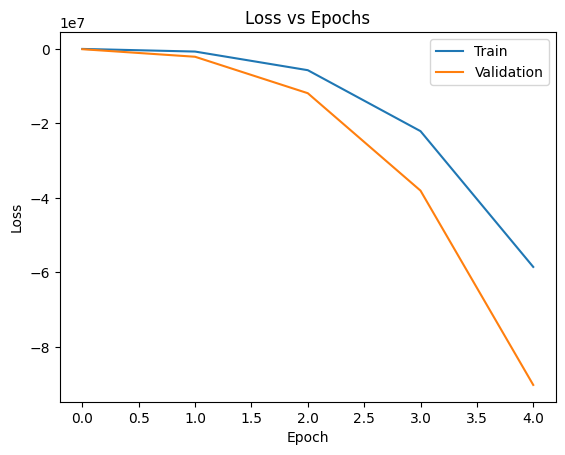

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend(["Train", "Validation"])
plt.show()


In [31]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict([X_test_char, X_test_ft, X_test_sx])

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.4f})")
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


ValueError: y_true takes value in {0, 4} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [32]:
vocab_size = len(char_tokenizer.word_index) + 2


In [33]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

# ---------- FIX APPLIED HERE ----------
vocab_size = len(char_tokenizer.word_index) + 2

char_input = Input(shape=(MAX_LEN,))
embed = Embedding(vocab_size, 64)(char_input)
conv = Conv1D(128, 5, activation='relu')(embed)
pool = GlobalMaxPooling1D()(conv)

ft_input = Input(shape=(300,))
sx_input = Input(shape=(40,))

merged = Concatenate()([pool, ft_input, sx_input])
dense = Dense(128, activation='relu')(merged)
dense = Dropout(0.4)(dense)
output = Dense(1, activation='sigmoid')(dense)

model = Model(inputs=[char_input, ft_input, sx_input], outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 300, 64)   │      8,448 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 296, 128)  │     41,088 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 468)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ input_layer_4[0]… │
│                     │                   │            │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     60,032 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        129 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 109,697 (428.50 KB)

 Trainable params: 109,697 (428.50 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(
    [X_train_char, X_train_ft, X_train_sx],
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1750 - loss: -2660.6252 - val_accuracy: 0.0000e+00 - val_loss: -97033.0625
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0044 - loss: -335773.1875 - val_accuracy: 0.0000e+00 - val_loss: -2251726.5000
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0166 - loss: -3729863.0000 - val_accuracy: 0.0000e+00 - val_loss: -12697574.0000
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0187 - loss: -17472526.0000 - val_accuracy: 0.0000e+00 - val_loss: -41156576.0000
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0195 - loss: -50059400.0000 - val_accuracy: 0.0000e+00 - val_loss: -98892336.0000


In [35]:
y_pred_proba = model.predict([X_test_char, X_test_ft, X_test_sx])


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
y_pred_proba = model.predict([X_test_char, X_test_ft, X_test_sx])
y_pred = (y_pred_proba > 0.5).astype(int)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


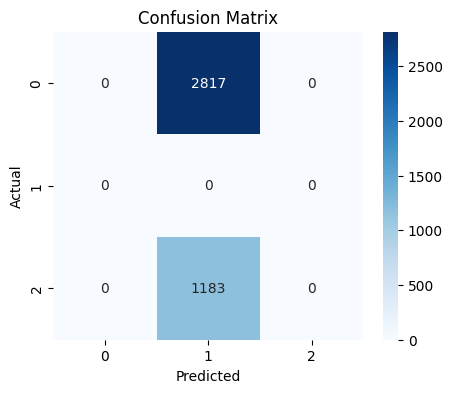

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    2817.0
           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00    1183.0

    accuracy                           0.00    4000.0
   macro avg       0.00      0.00      0.00    4000.0
weighted avg       0.00      0.00      0.00    4000.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [39]:
# Convert labels: 4 → 1
df['label'] = df['label'].replace(4, 1)


In [40]:
y_test = np.where(y_test == 4, 1, y_test)
y_pred_proba = y_pred_proba.reshape(-1)


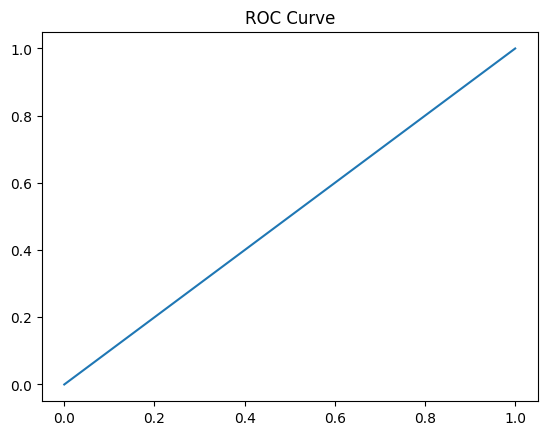

In [41]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.show()


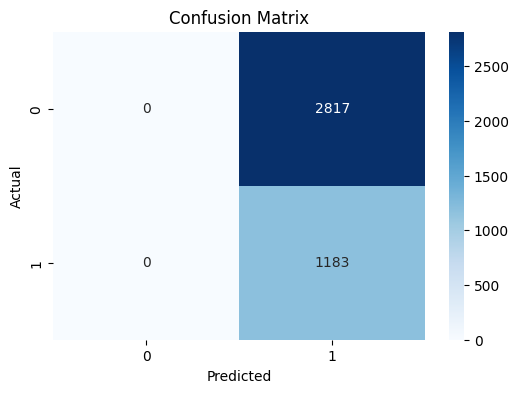

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predicted classes
y_pred = (y_pred_proba > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


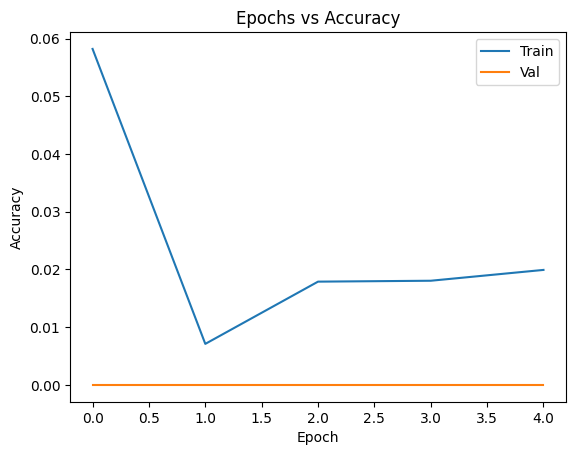

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Epochs vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])
plt.show()


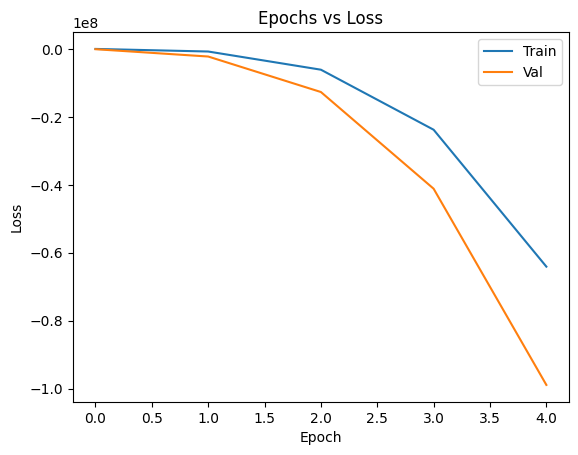

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Epochs vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.show()


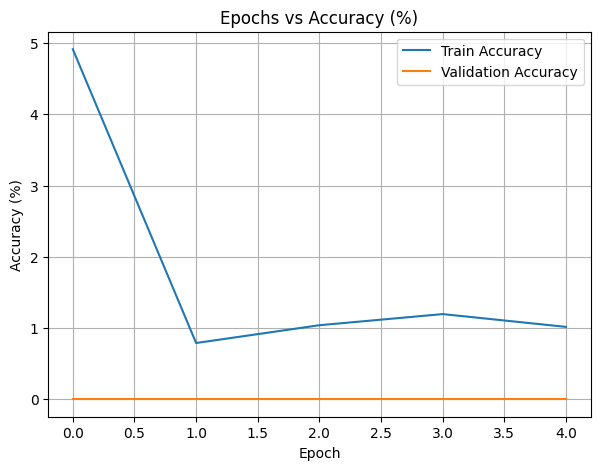

In [45]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print("Accuracy (%):", accuracy_percentage)


Accuracy (%): 29.575000000000003


In [47]:
# ===========================================================
# (A) TEXT CLEANING + PREPROCESSING
# ===========================================================
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)     # remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)          # remove special chars
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df["clean_tweet"] = df["tweet"].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
# ===========================================================
# (B) TRAIN–TEST SPLIT
# ===========================================================
from sklearn.model_selection import train_test_split

X = df["clean_tweet"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=3
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000, C=2.0)
model.fit(X_train_vec, y_train)


LogisticRegression(C=2.0, max_iter=2000)

In [52]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")


Accuracy: 84.325 %
